# The logistic equation

The logistic equation is a simplified model of the growth of a population of organisms. It is a 1-dimensional system that obeys the following ordinary differential equation:

$\dot{N} = f(N) = r N (1-\frac{N}{k})$

where $N(t)$ is the population size at time $t$, $r$ is the _growth rate_, and $k$ is the _carrying capacity_, i.e., the value of population over which the growth rate actually becomes negative.

The solution to the logistic equation can be computed analytically:

$N(t) = \frac{k}{1 + A\mathrm{e}^{-rt}}$,

with $A=\frac{k}{N_0}-1$.

In this notebook, we explore a graphical approach to calculating the equilibria of the logistic equation and their stability.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The system
Even though the logistic system is made up of only one equation, we still refer to it as "system", as per nomenclature of dynamical systems' theory.

In [2]:
logistic = lambda t,N,r,k: r*N*(1-N/k)
r,k = 0.1,1
# characteristic time constant
τ = 1/r

First, we plot $f(N)$ and identify the equilibria of the system as intersections of $f(N)$ with the x-axis, corresponding to $\dot{N}=0$, i.e., points where the _rate_ of change of $N$ is zero.

The system has two equilibria:
1. $N=0$ is unstable: points on the line to its left have $\dot{N}<0$, which will make $N$ decrease, whereas points on the line greater than $0$ have $\dot{N}>0$, making $N$ increase. In both cases, a solution will move  _away_ from $N=0$.
1. $N=k$ is stable, as can be seen with similar reasoning as just done for $N=0$.

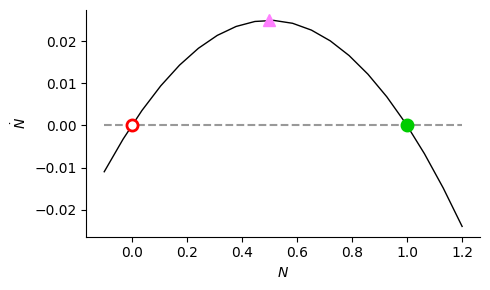

In [3]:
N = np.linspace(-k/10, k*1.2, 20)
y = logistic(0, N, r, k)
fig,ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(N[[0,-1]], np.zeros(2), '--', color=[.6,.6,.6])
ax.plot(N, y, 'k', lw=1)
ax.plot(k/2, k*r/4, '^', color=[1,.5,1], ms=8)
ax.plot(0, 0, 'o', color=[1,0,0], markerfacecolor='w', markeredgewidth=2, ms=8)
ax.plot(k, 0, 'o', color=[0,.8,0], markeredgewidth=2, ms=8)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\dot{N}$')
sns.despine()
fig.tight_layout()

### Linear stability analysis

Let's consider a dynamical system described by a set of ordinary differential equations of the form

$\dot{x} = f(x)$.

Now let's assume that there exists a point $x=\hat{x}$ such that $f(\hat{x})=0$, i.e., $\hat{x}$ is an equilibrium of the system.

We want to understand how perturbations around $\hat{x}$ evolve over time, in particular whether they decay to zero (i.e., the equilibrium point is stable) or grow (i.e., the equilibrium is unstable). To do that, we take the derivative w.r.t. time of $\hat{x}+\Delta x$, where $\Delta x$ is the size of the perturbation.

$\frac{d}{dt} (\hat{x}+\Delta x) = \dot{\Delta x} = f(\hat{x}+\Delta x) = f(\hat{x}) + \Delta x f'(\hat{x}) + \mathcal{O}(\Delta x^2)$,

where we have used the fact that $\frac{d\hat{x}}{dt} = f(\hat{x})=0$ and the Taylor expansion of $f$ around the point $\hat{x}+\Delta x$.

If $\Delta x$ is small enough (i.e., the magnitude of the perturbation is such that it keeps the solution close enough to the equilibrium point $\hat{x}$), the term $\mathcal{O}(\Delta x^2)$ is negligible and therefore we can approximate the previous equation as

$\dot{\Delta x} \approx \Delta x f'(\hat{x})$,

which describes the dynamics of the perturbation around the equilibrium point $\hat{x}$.

From this equation, we conclude that perturbations decay exponentially (i.e., the equilibrium is stable) if $f'(\hat{x}) = \frac{\partial f}{\partial x} (\hat{x}) < 0$. On the other hand, if $f'(\hat{x}) > 0$, perturbations increase exponentially, i.e., the equilibrium is unstable.

$f'(x) = \frac{\partial f}{\partial x} (x)$ is the so-called Jacobian matrix of the system. In the case of a 1D system, this is just a scalar, and its sign determines whether the equilibrium is stable or not. If the system has more than one dimension, to study the stability of the equilibrium points one has to compute the real part of the eigenvalues of the Jacobian matrix: if they are all negative, then the equilibrium is stable, otherwise it is unstable.

For the logistic equation, the Jacobian matrix is $J(N) = r-\frac{2rN}{k}$; the value of the Jacobian in the two equilibria is $J(0)=r>0$ and $J(k)=-r<0$, which confirms our previous results about the stability of the equilibria of the system.

### Numerical integration

Let's integrate numerically the system and verify that we find the same solution as the analytical one.

Here we use `solve_ivp`, a function contained in the SciPy package, to integrate numerically the system. See the notebook about the [Euler method](Euler_method.ipynb) for a brief discussion about numerical integration methods.

In [4]:
N0 = 1e-3
tspan = [0,15*τ]
dt = 0.02*τ
t = np.r_[tspan[0] : tspan[1] : dt]
A = k/N0 - 1
y  = k / (1+A*np.exp(-r*t))
sol = solve_ivp(lambda t,x: logistic(t,x,r,k), tspan, [N0], method='RK45', rtol=1e-6, atol=1e-8)

Plot the results.

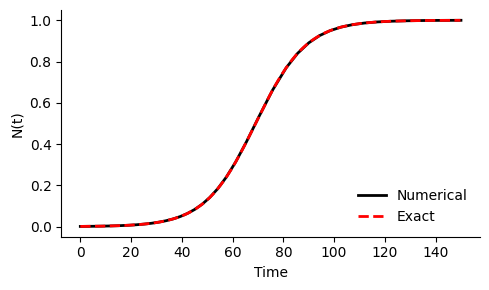

In [5]:
fig,ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(sol.t, sol.y[0], 'k', lw=2, label='Numerical')
ax.plot(t, y, 'r--', lw=2, label='Exact')
ax.legend(loc='lower right', frameon=False)
ax.set_xlabel('Time')
ax.set_ylabel('N(t)')
sns.despine()
fig.tight_layout()